In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4)#, suppress=True)
%cd -q ../test/

# SparseEdges: comparing efficiency

Our goal here is to test the influence of the size of the image on its sparseness.  

This class exploits the SparseEdges package to provide with a sparse representation of edges in images.

This notebook reproduces the figure 14.4 of the following paper:

~~~~{.bibtex}
@inbook{Perrinet15bicv,
    author = {Perrinet, Laurent U.},
    booktitle = {Biologically-inspired Computer Vision},
    chapter = {13},
    citeulike-article-id = {13566753},
    editor = {Keil, Matthias and Crist\'{o}bal, Gabriel and Perrinet, Laurent U.},
    keywords = {anr-trax, bicv-sparse},
    posted-at = {2015-03-31 14:21:35},
    priority = {2},
    publisher = {Wiley, New-York},
    title = {Sparse models},
    year = {2015}
}
~~~~


More information is available @ http://nbviewer.ipython.org/github/bicv/SparseEdges/blob/master/SparseEdges.ipynb
Tests for the packages are available @ http://nbviewer.ipython.org/github/bicv/SparseEdges/blob/master/test-SparseEdges.ipynb.

### Effect of parameters on edge extraction: filter parameters



In [2]:
%%writefile experiment_efficiency.py
#! /usr/bin/env python
# -*- coding: utf8 -*-
from __future__ import division, print_function
"""

$ ipython experiment_efficiency.py

rm -fr **/efficiency_* **/**/efficiency_* 

"""
import numpy as np
from SparseEdges import SparseEdges

threshold = None # classical plots
threshold = .3 # plot L0 sparseness obtained when reaching this threshold
 
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
def init_mp():
    mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
    mp.pe.seed = 42
    mp.pe.N_image = 60
    mp.pe.datapath = 'database/'
    mp.pe.figpath = '../figures/'    
    return mp

import matplotlib
matplotlib.use('Agg') 

import matplotlib.pyplot as plt
fig_width_pt = 318.67085 # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches

# ==================================================================================================#
fig, [[A, B], [C, D]] = plt.subplots(2, 2, figsize=(fig_width, fig_width), subplot_kw={'axisbg':'w'})
# ==================================================================================================#
mps, experiments = [], []
v_B_sf = np.logspace(-.2, .2, 5, base=10, endpoint=True)*mp.pe.B_sf
for B_sf in v_B_sf:
    mp = init_mp()
    mp.pe.B_sf = B_sf
    exp = 'efficiency_B_sf_' + str(B_sf).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)

databases = ['serre07_distractors'] * len(experiments)
labels = ['%0.2f' % B_sf for B_sf in v_B_sf]
try:
    fig, A, inset = mp.plot(mps=mps,
                      experiments=experiments, databases=databases, labels=labels, ref=2,
                      fig=fig, ax=A, color=[0., 1., 0.], threshold=threshold, scale=False)    
    A.set_xlabel(r'frequency bandwith $B_{sf}$')
except Exception as e:
    print('Failed to plot  with error : %s ' % e )

# ==================================================================================================#    
mps, experiments = [], []
v_B_theta = np.logspace(-.5, .5, 5, base=10, endpoint=True)*mp.pe.B_theta
for B_theta in v_B_theta:
    mp = init_mp()
    mp.pe.B_theta = B_theta
    exp = 'efficiency_B_theta_' + str(B_theta).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)

databases = ['serre07_distractors'] * len(experiments)
labels = ['%0.2f' % B_theta for B_theta in v_B_theta]
try:
    fig, B, inset = mp.plot(mps=mps, 
                      experiments=experiments, databases=databases, labels=labels, ref=2, 
                      fig=fig, ax=B, threshold=threshold, scale=False, color=[0., 1., 0.])    
    B.set_xlabel(r'orientation bandwith $B_{\theta}$ (radians)')
    B.set_ylabel('')
except Exception as e:
    print('Failed to plot  with error : %s ' % e )

# ==================================================================================================#    
mps, experiments = [], []
v_n_theta = [6, 12, 24, 48]
for n_theta in v_n_theta:
    mp = init_mp()
    mp.pe.n_theta = n_theta
    mp = init_mp()
    exp = 'efficiency_n_theta_' + str(n_theta).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)

databases = ['serre07_distractors'] * len(experiments)
labels = [str(n_theta) for n_theta in v_n_theta]
try:
    fig, C, inset = mp.plot(mps=mps, 
                      experiments=experiments, databases=databases, labels=labels, ref=2, 
                      fig=fig, ax=C, threshold=threshold, scale=True, color=[0., 1., 0.])    
    C.set_xlabel(r'number of orientations $N_{\theta}$')
except Exception as e:
    print('Failed to plot  with error : %s ' % e )

# ==================================================================================================#    
mps, experiments = [], []
v_base_levels = [np.sqrt(2), np.sqrt(5)/2.+.5, np.sqrt(3), 2. , np.sqrt(5)]
#np.logspace(.25, 1.25, 5, base=2, endpoint=True)
for base_levels in v_base_levels:
    mp = init_mp()
    mp.pe.base_levels = base_levels
    mp = init_mp()
    exp = 'efficiency_base_levels_' + str(base_levels).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)

databases = ['serre07_distractors'] * len(experiments)
labels = ['%0.2f' % (base_levels) for base_levels in v_base_levels]
labels[0] = r'$\sqrt{2}$'
labels[1] = r'$\phi$'
labels[3] = '2'
try:
    fig, D, inset = mp.plot(mps=mps, 
                      experiments=experiments, databases=databases, labels=labels, ref=3, 
                      fig=fig, ax=D, threshold=threshold, scale=True, color=[0., 1., 0.])    
    D.set_xlabel(r'scale ratio')
    D.set_ylabel('')
    D.set_yticks([0., 1., 1.3])
    D.set_yticklabels(['0', '1', ''])
except Exception as e:
    print('Failed to plot  with error : %s ' % e )

for ax, label in zip([A, B, C, D], ['A', 'B', 'C', 'D']):
    ax.text(-.1, .95, label, transform=ax.transAxes, fontsize=12) #'('+label+')'
    ax.set_ylim([0., 1.5])
    ax.set_yticks([0., 1., 1.5])
    ax.set_yticklabels(["0", '1', '1.5'])
    if label in ['B', 'D']: ax.set_yticklabels(['', '', ''])
        
#The parameter meanings (and suggested defaults) are::
#
#  left  = 0.125  # the left side of the subplots of the figure
#  right = 0.9    # the right side of the subplots of the figure
#  bottom = 0.1   # the bottom of the subplots of the figure
#  top = 0.9      # the top of the subplots of the figure
#  wspace = 0.2   # the amount of width reserved for blank space between subplots
#  hspace = 0.2   # the amount of height reserved for white space between subplots
fig.subplots_adjust(wspace=0.12, hspace=0.3,
                            left=0.125, right=0.98,
                            top=0.98,    bottom=0.12)
    
mp.savefig(fig, 'efficiency', figpath = '../figures/')

Overwriting experiment_efficiency.py


Checking dependence in serre07_distractors_efficiency_B_sf_0_503570164718
------------------------------------------------------------
Entropy: 1.19846918162
------------------------------------------------------------
------------------------------------------------------------
[['d', 'phi', 'theta', 'scale']] KL= 0.00000 ; 0.000
[['phi', 'theta', 'scale'], ['d']] KL= 0.00231 ; 0.193
[['theta', 'scale', 'd'], ['phi']] KL= 0.00109 ; 0.091
[['scale', 'd', 'phi'], ['theta']] KL= 0.00132 ; 0.110
[['d', 'phi', 'theta'], ['scale']] KL= 0.00217 ; 0.181
[['phi', 'theta'], ['scale', 'd']] KL= 0.00061 ; 0.051
[['theta', 'scale'], ['d', 'phi']] KL= 0.00310 ; 0.259
[['scale', 'phi'], ['d', 'theta']] KL= 0.00309 ; 0.258
[['phi', 'theta'], ['scale'], ['d']] KL= 0.00248 ; 0.207
[['theta', 'scale'], ['d'], ['phi']] KL= 0.00314 ; 0.262
[['scale', 'd'], ['phi'], ['theta']] KL= 0.00137 ; 0.114
[['d', 'phi'], ['theta'], ['scale']] KL= 0.00321 ; 0.268
[['d'], ['phi'], ['theta'], ['scale']] KL= 0.00325 ; 0

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Checking dependence in serre07_distractors_efficiency_n_theta_24
------------------------------------------------------------
Entropy: 1.18024699339
------------------------------------------------------------
------------------------------------------------------------
[['d', 'phi', 'theta', 'scale']] KL= -0.00000 ; 0.000
[['phi', 'theta', 'scale'], ['d']] KL= 0.00237 ; 0.201
[['theta', 'scale', 'd'], ['phi']] KL= 0.00112 ; 0.095
[['scale', 'd', 'phi'], ['theta']] KL= 0.00135 ; 0.114
[['d', 'phi', 'theta'], ['scale']] KL= 0.00225 ; 0.191
[['phi', 'theta'], ['scale', 'd']] KL= 0.00059 ; 0.050
[['theta', 'scale'], ['d', 'phi']] KL= 0.00320 ; 0.271
[['scale', 'phi'], ['d', 'theta']] KL= 0.00320 ; 0.271
[['phi', 'theta'], ['scale'], ['d']] KL= 0.00254 ; 0.215
[['theta', 'scale'], ['d'], ['phi']] KL= 0.00323 ; 0.274
[['scale', 'd'], ['phi'], ['theta']] KL= 0.00140 ; 0.119
[['d', 'phi'], ['theta'], ['scale']] KL= 0.00332 ; 0.281
[['d'], ['phi'], ['theta'], ['scale']] KL= 0.00335 ; 0.284
---

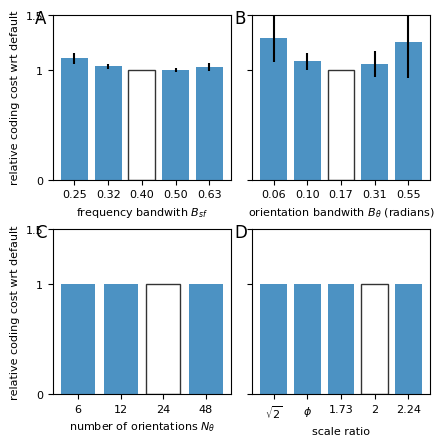

In [3]:
%run experiment_efficiency.py
fig

As we test different parameters for the filters, we measured the gain in efficiency for the algorithm as the ratio of the code length to achieve $85\%$ of energy extraction relative to that for the default parameters (white bar). The average is computed on the same database of natural images and error bars denote the standard deviation of gain over the database. First, we studied the effect of the bandwidth of filters respectively in the $\textsf{(A)}$ spatial frequency and $\textsf{(B)}$ orientation spaces. The minimum is reached for the default parameters: this shows that default parameters provide an optimal compromise between the precision of filters in the frequency and position domains for this database. We may also compare pyramids with different number of filters.  Indeed, efficiency (in bits) is equal to the number of selected filters times the coding cost for the address of each edge in the pyramid.
We plot here the average gain in efficiency which shows an optimal compromise respectively for respectively $\textsf{(C)}$ the number of orientations and $\textsf{(D)}$ the number of spatial frequencies (scales). Note first that with more than 12 directions, the gain remains stable. Note also that a dyadic scale ratio (that is of 2) is efficient but that other solutions ---such as using the golden section $\phi$--- prove to be significantly more efficient, though the average gain is relatively small (inferior to $5\%$).

## some book keeping for the notebook

In [4]:
import watermark
%watermark

In [5]:
import version_information
%version_information numpy, scipy, matplotlib

In [6]:
%cd -q ../notebooks/